In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import meteva.method as mem
import numpy as np

***通过随机函数生成测试数据，用于后续检验函数调用示例***

In [2]:
fo = np.random.rand(1000)
error = np.random.rand(1000)-0.5
ob = fo + error
ob[ob>0.5] = 1
ob[ob<=0.5] = 0

### 区分能力图  
**discrimination(ob, fo, grade_count = 10,save_path=None)**  
绘制预报概率为不同区间下观测样本事件发生和不发生的样本占总样本的比例。  
  
**参数说明：**  
 Ob:实况数据，任意维numpy数组   
 Fo:预测数据，任意维numpy数组,Fo.shape 和Ob.shape一致  
 grade_count: 区分等级数 大于1的整数，它0 - 1 的概率预报区间划分为grade_count等分。缺省值为10  
 save_path：图片保存路径，缺省时不输出图片，而是以默认绘图窗口形式展示  
 return: None  
 **调用示例：**

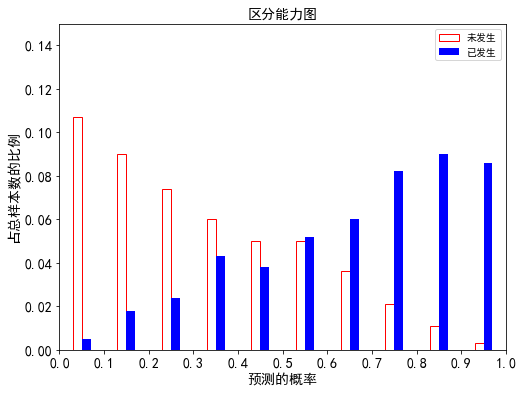

In [3]:
mem.discrimination(ob,fo)

### ROC图  
**roc(ob, fo, grade_count = 10, save_path=None)**  
绘制ROC曲线，曲线以空报率（pofd）作为横坐标，以命中率（pod）为纵坐标。其中曲线描点为预报概率设置不同阈值作为预报发生的条件下，对应的（空报率，命中率）。  
  
**参数说明：**  
 Ob:实况数据，任意维numpy数组   
 Fo:预测数据，任意维numpy数组,Fo.shape 和Ob.shape一致  
 grade_count: 区分等级数 大于1的整数，roc曲线上描点对应的概率阈值以 1/grade_count 递增。缺省值为10  
 save_path：图片保存路径，缺省时不输出图片，而是以默认绘图窗口形式展示  
 return: None  
 **调用示例：** 

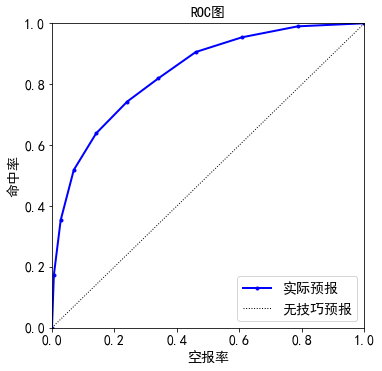

In [4]:
mem.roc(ob,fo)

### 可靠性图   
**reliability(ob, fo, grade_count = 10, save_path=None)**  
绘制可靠性图，其中横坐标为预报概率。纵向分为主次两幅子图，主图纵坐标为同一预报概率区间下实况样本事件发生的比例。次图为每个预报区间对应的预报样本数。  
  
**参数说明：**  
 Ob:实况数据，任意维numpy数组   
 Fo:预测数据，任意维numpy数组,Fo.shape 和Ob.shape一致   
 grade_count: 区分等级数 大于1的整数，它0 - 1 的概率预报区间划分为grade_count等分。缺省值为10  
 save_path：图片保存路径，缺省时不输出图片，而是以默认绘图窗口形式展示  
 return: None  
 **调用示例：** 

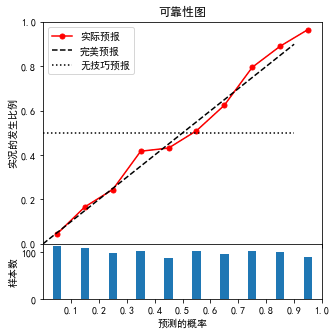

In [5]:
mem.reliability(ob,fo)

在可靠性图的计算和绘制过程中，如果某个区间的预报样本数为0，则会出现除0的情况，该区间对应的观测比例值为缺失值，此时程序会默认以虚线以线性插值的方式连接线条连接临近的描点，并在图中绘制×表示其缺失值。以下为效果示例：

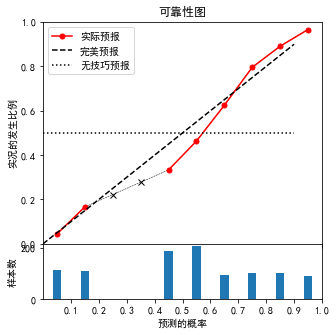

In [6]:
index = np.where((fo >=0.2) &(fo <= 0.4)) 
fo[index[0]] += 0.2    #故意将某些区间的样本移动其它区间上
mem.reliability(ob,fo)

### 综合检验图   
**comprehensive_probability(ob, fo, grade_count = 10, save_path=None)**  
可靠性图、ROC图和区分能力图的组合图。 
  
**参数说明：**  
 Ob:实况数据，任意维numpy数组   
 Fo:预测数据，任意维numpy数组,Fo.shape 和Ob.shape一致   
 grade_count: 区分等级数 大于1的整数，它0 - 1 的概率预报区间划分为grade_count等分。缺省值为10  
 save_path：图片保存路径，缺省时不输出图片，而是以默认绘图窗口形式展示  
 return: None  
 **调用示例：** 

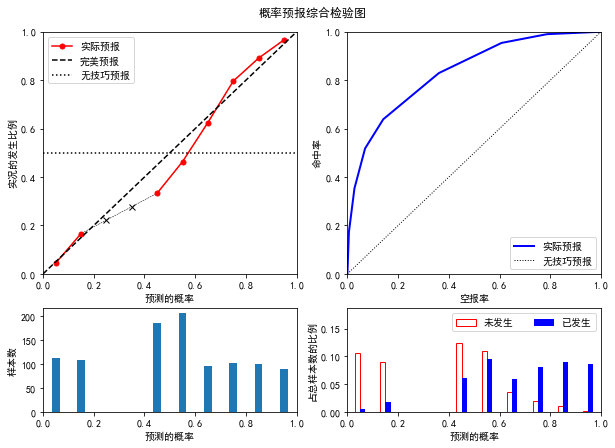

In [7]:
mem.comprehensive_probability(ob,fo)

在以上示例中，观测和预报的数据都直接输入到评分函数中进行计算，然而有些情况下待检验的数据太大不能整体存入一个numpy数组中，或者不方便整体存入一个numpy数组中，此时就不能调用上面的方式调用评分函数。为此本程序库设计了一套可分块计算的检验程序。
其检验步骤如下：
步骤1：根据需要将分块数据逐一输入到中间结果计算函数
步骤2：将中间结果进行累加或合并
步骤3：根据累加或合并的中间结果计算检验指标
通常上述计算中步骤1是最耗费计算资源，为了提高效率步骤1也可以采用并行的方式执行。此外，步骤1执行的结果也可输出到文件中，在后续的检验可以从中读入部分中间结果执行后续步骤，从而可以实现各种方式的分组检验，大大提高检验计算效率。

### 区分能力表
**hnh(Ob,Fo,grade_count = 10)**  
统计预报概率为不同区间下观测样本事件发生和不发生的样本数。

**参数说明：**  
 Ob:实况数据，任意维numpy数组  
 Fo:预测数据，任意维numpy数组,Fo.shape 和Ob.shape一致  
 grade_count: 区分等级数 大于1的整数，它0 - 1 的概率预报区间划分为grade_count等分。缺省值为10    
 return: grade_count × 2 的numpy数组，其中元素[i,0]和[i,1]分别为预报概率在第i个区间，观测发生和不发生的样本数。   
**调用示例：**  

In [8]:
grade_count = 10
dataSet_num = 100
hnh_array = np.zeros((grade_count,2))
for i in range(dataSet_num):
    fo = np.random.rand(100)
    er = np.random.rand(100)-0.5
    ob0 = fo + er
    ob = np.zeros_like(ob0)
    ob[ob0>0.5] = 1
    ob[ob0<=0.5] = 0
    hnh_array += mem.hnh(ob,fo,grade_count)

### 区分能力图  
**discrimination_hnh(hnh_array,save_path=None)**  
绘制预报概率为不同区间下观测样本事件发生和不发生的样本占总样本的比例。  
  
**参数说明：**  
 hnh_array: grade_count × 2 的numpy数组，其中元素[i,0]和[i,1]分别为预报概率在第i个区间，观测发生和不发生的样本数。    
 save_path：图片保存路径，缺省时不输出图片，而是以默认绘图窗口形式展示  
 return: None  
 **调用示例：**

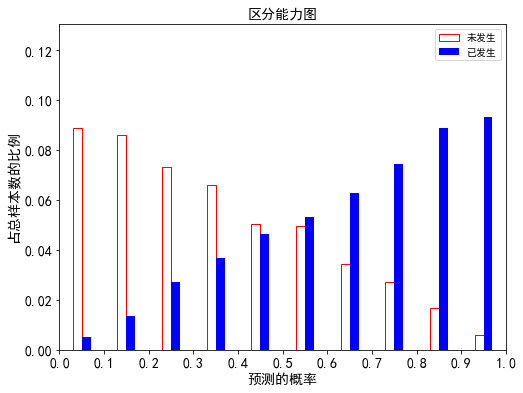

In [9]:
mem.discrimination_hnh(hnh_array)

### ROC图  
**roc_hnh(hnh_array,save_path=None)**  
绘制ROC曲线，曲线以空报率（pofd）作为横坐标，以命中率（pod）为纵坐标。其中曲线描点为预报概率设置不同阈值作为预报发生的条件下，对应的（空报率，命中率）。  
  
**参数说明：**  
 hnh_array: grade_count × 2 的numpy数组，其中元素[i,0]和[i,1]分别为预报概率在第i个区间，观测发生和不发生的样本数。    
 save_path：图片保存路径，缺省时不输出图片，而是以默认绘图窗口形式展示  
 return: None  
 **调用示例：**

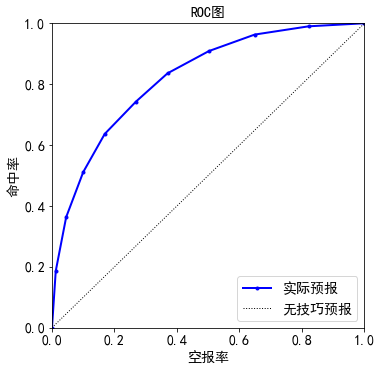

In [10]:
mem.roc_hnh(hnh_array)

### 可靠性图  
**reliability_hnh(hnh_array,save_path=None)**  
绘制可靠性图，其中横坐标为预报概率。纵向分为主次两幅子图，主图纵坐标为同一预报概率区间下实况样本事件发生的比例。次图为每个预报区间对应的预报样本数。   
  
**参数说明：**  
 hnh_array: grade_count × 2 的numpy数组，其中元素[i,0]和[i,1]分别为预报概率在第i个区间，观测发生和不发生的样本数。    
 save_path：图片保存路径，缺省时不输出图片，而是以默认绘图窗口形式展示  
 return: None  
 **调用示例：**

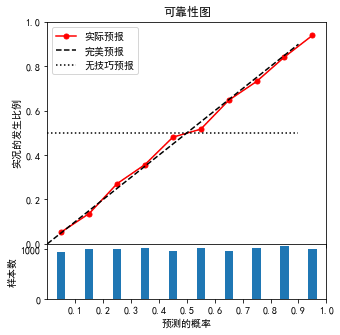

In [11]:
mem.reliability_hnh(hnh_array)

### 综合检验图   
**comprehensive_hnh(hnh_array,save_path=None)**  
可靠性图、ROC图和区分能力图的组合图。  
  
**参数说明：**  
 hnh_array: grade_count × 2 的numpy数组，其中元素[i,0]和[i,1]分别为预报概率在第i个区间，观测发生和不发生的样本数。    
 save_path：图片保存路径，缺省时不输出图片，而是以默认绘图窗口形式展示  
 return: None  
 **调用示例：**

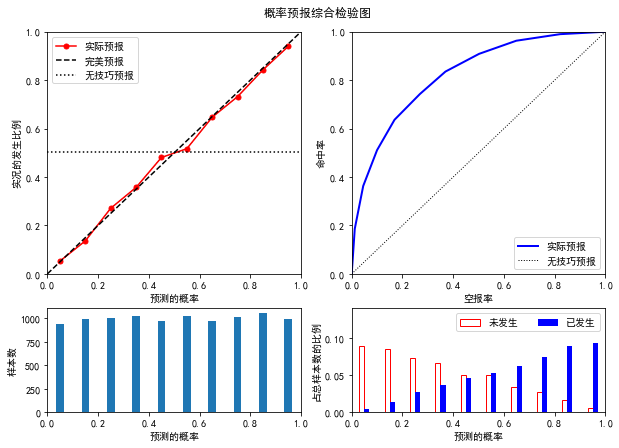

In [12]:
mem.comprehensive_hnh(hnh_array)